In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
db_path = "anlage1.db"  # Replace with your actual database file name
conn = sqlite3.connect(db_path)

# Get table names
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
print("Available tables:\n", tables)

# Load data from the main table (Replace 'your_table' with actual table name)
rohdaten = "rohdaten"  # Adjust accordingly
df_rohdaten = pd.read_sql(f"SELECT * FROM {rohdaten}", conn)

rohdaten_AF_bereinigt = "rohdaten_AF_bereinigt"  # Adjust accordingly
df_rohdaten_AF_bereinigt = pd.read_sql(f"SELECT * FROM {rohdaten_AF_bereinigt}", conn)

rohdaten_AP_bereinigt_nur_norm = "rohdaten_AP_bereinigt_nur_norm"  # Adjust accordingly
df_rohdaten_AP_bereinigt_nur_norm = pd.read_sql(f"SELECT * FROM {rohdaten_AP_bereinigt_nur_norm}", conn)

# Display basic info
print("Rohdaten: ", df_rohdaten.shape)
print("Rohdaten AF bereinigt: ", df_rohdaten_AF_bereinigt.shape)
print("Rohdaten AP bereinigt nur norm: ", df_rohdaten_AP_bereinigt_nur_norm.shape)



Available tables:
                              name
0                 sqlite_sequence
1                        rohdaten
2                         befehle
3           rohdaten_AF_bereinigt
4  rohdaten_AP_bereinigt_nur_hoch
5  rohdaten_AP_bereinigt_nur_tief
6  rohdaten_AP_bereinigt_nur_norm
7                     unique_days
Rohdaten:  (1000000, 6)
Rohdaten AF bereinigt:  (999297, 6)
Rohdaten AP bereinigt nur norm:  (999732, 6)


/var/folders/5l/17p9bmwj48n9j4n8f9r2tn_h0000gn/T/ipykernel_18689/2433895621.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_rohdaten.hist(ax=axes[0], bins=30, color='red', alpha=0.6)


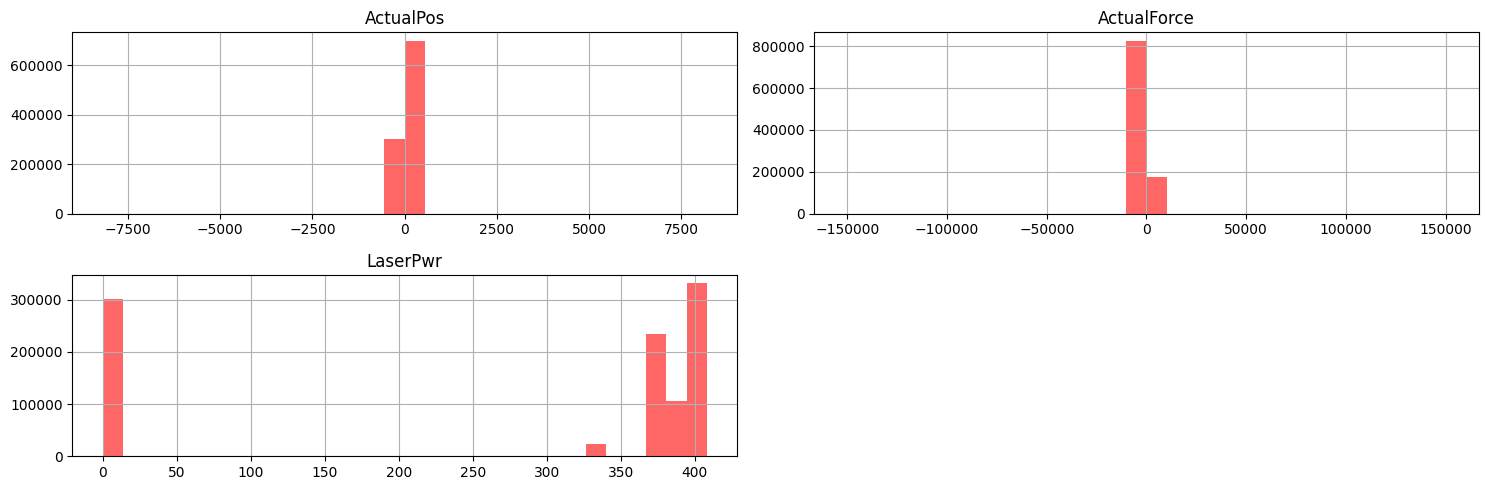

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

df_rohdaten.hist(ax=axes[0], bins=30, color='red', alpha=0.6)
axes[0].set_title('Rohdaten')

plt.tight_layout()
plt.show()

In [10]:
df_rohdaten_AF_bereinigt.hist(ax=axes[1], bins=30, color='blue', alpha=0.6)
axes[1].set_title('Rohdaten AF bereinigt')

/var/folders/5l/17p9bmwj48n9j4n8f9r2tn_h0000gn/T/ipykernel_18689/2481083021.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_rohdaten_AF_bereinigt.hist(ax=axes[1], bins=30, color='blue', alpha=0.6)


Text(0.5, 1.0, 'Rohdaten AF bereinigt')

In [14]:
# Basic statistics
print(df.describe())

# Check unique values in categorical columns (adjust column names)
categorical_cols = ['Nahtnummer', 'Befehl']  # Replace with actual categorical columns
for col in categorical_cols:
    print(f"Unique values in {col}:\n", df[col].value_counts())


            ActualPos     ActualForce        LaserPwr
count  1000000.000000  1000000.000000  1000000.000000
mean        -8.174710     -574.953371      268.952781
std        136.541504     4021.754611      177.650401
min      -8192.000000  -151386.000000        0.000000
25%         -0.500000     -693.000000        0.000000
50%          0.800000     -691.000000      376.000000
75%          1.400000     -520.000000      396.000000
max       8191.900000   151388.000000      408.000000
Unique values in Nahtnummer:
 Nahtnummer
EMME    65082
FINL    56614
KHP     56363
EMMC    51707
KGL     32133
        ...  
DFIC        6
LOO         5
LNK         3
LOK         2
DFGD        1
Name: count, Length: 64, dtype: int64
Unique values in Befehl:
 Befehl
PUTG348_46360638    53644
PUTG348_46360610    45048
PUTG348_46360641    44777
PUTG348_46360622    44522
PUTG348_46360632    44220
                    ...  
PUTG463_46360775        1
PUTG463_46360778        1
PMEAS                   1
PNB42         

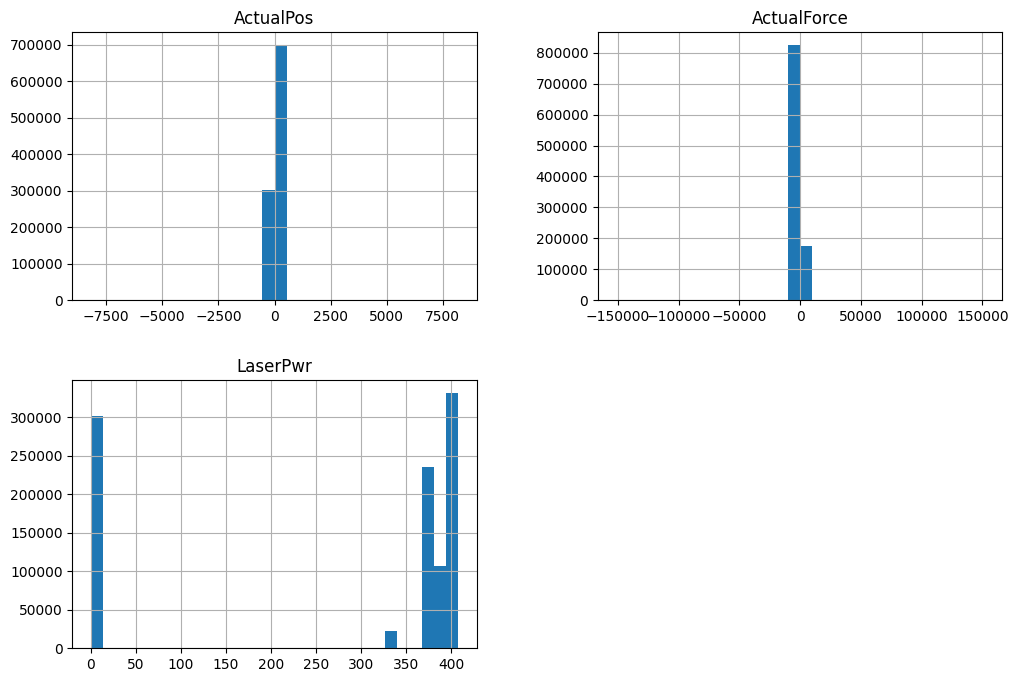

In [16]:
df.hist(figsize=(12, 8), bins=30)
plt.show()


In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



ValueError: could not convert string to float: '2021-06-21T14:27:15.007Z'

<Figure size 1000x600 with 0 Axes>

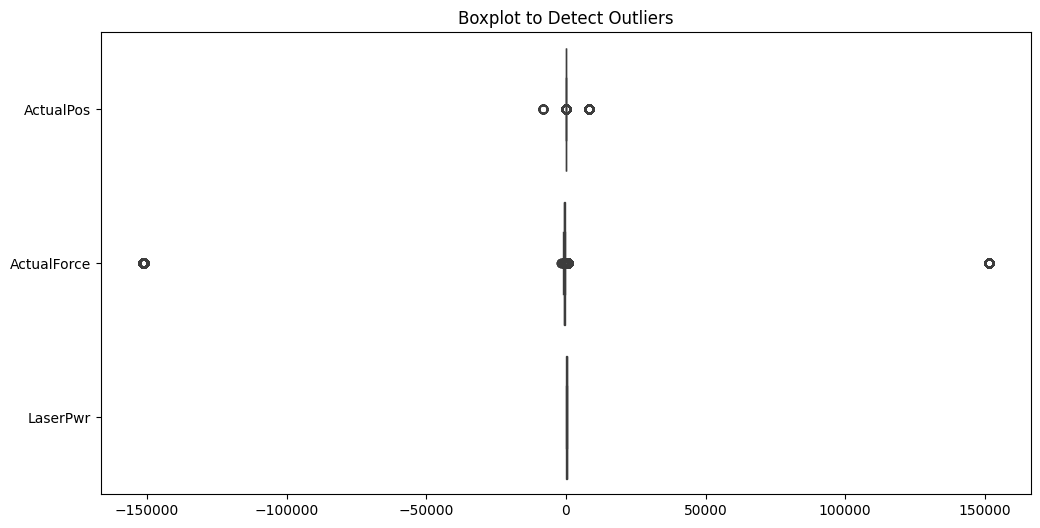

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot to Detect Outliers")
plt.show()



In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["TimeStamp"], y=df["ActualForce"], label="Force")
sns.lineplot(x=df["TimeStamp"], y=df["ActualPos"], label="Position")
plt.legend()
plt.title("Time Series Analysis of Force & Position")
plt.xticks(rotation=45)
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x10acc42c0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 